In [7]:
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import numpy as np
import nltk.data
from __future__ import division  # Python 2 users only
import nltk, re, pprint
from nltk import word_tokenize

## Open the files

In [16]:
cmu_trans = open('transcription_cmu.txt','rU').read()
wat_trans = open('transcription_watson_2.txt','rU').read()
stop = set(stopwords.words('english'))

str

# Tokenize and lower

In [92]:
def tokenize_and_lower(textfile):
    tokens = word_tokenize(textfile)
    lower = [w.lower() for w in tokens]
    filtered_words = [word for word in lower if word not in stop]
    series = pd.Series(filtered_words)
    return series

'''def keep_stop_words(textfile):
    tokens = word_tokenize(textfile)
    lower = [w.lower() for w in tokens]
    nonfiltered_words = [word for word in lower if word in stop]
    series = pd.Series(nonfiltered_words)
    return series
#cmu_stop = keep_stop_words(cmu_trans)
#wat_stop = keep_stop_words(wat_trans)'''

# Compare Results with value_counts

In [119]:
cmu = tokenize_and_lower(cmu_trans)
wat = tokenize_and_lower(wat_trans)
cmu = pd.Series.to_frame(cmu)
wat = pd.Series.to_frame(wat)
cmu.columns = [['words']]
wat.columns = [['words']]
cmu = cmu.groupby('words').size().reset_index()
wat = wat.groupby('words').size().reset_index()
df = pd.merge(cmu, wat, on='words')
df.columns = [['words','cmu','wat']]
df['cmu_diff_wat'] = df.cmu - df.wat

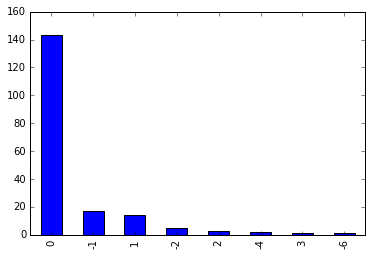

In [126]:
%matplotlib inline
df.cmu_diff_wat.value_counts().plot(kind='bar')

In [125]:
df.cmu_diff_wat.value_counts()

 0    143
-1     17
 1     14
-2      5
 2      3
-4      2
 3      1
-6      1
Name: cmu_diff_wat, dtype: int64